In [1]:
import csv
import math
import random
import statistics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Load dataset

In [2]:
# Convert data from csv file to 2d list
with open('haberman.csv', 'r') as file:
    reader = csv.reader(file)
    data = []
    for row in reader:
        int_row = [float(x) for x in row]  # convert elements to integers
        data.append(int_row)

# print(data)

# unique labels
unique_labels = list(set([row[-1] for row in data]))

for i in data:
    if i[-1] == unique_labels[0]:
        i[-1] = 0
    else:
        i[-1] = 1

# data



Split dataset into training and testing sets

In [3]:
# Shuffle the dataset
random.shuffle(data)
print(data)

# Set the ratio of training data to testing data
train_ratio = 0.8
test_ratio = 0.2

# Calculate the number of instances to use for training and testing
num_train = int(len(data) * train_ratio)
num_test = len(data) - num_train

train_data = data[:num_train]
test_data = data[num_train:]


# print(train_data)

[[38.0, 59.0, 2.0, 0], [39.0, 63.0, 4.0, 0], [56.0, 60.0, 0.0, 0], [44.0, 64.0, 6.0, 1], [70.0, 67.0, 0.0, 0], [57.0, 69.0, 0.0, 0], [49.0, 67.0, 1.0, 0], [58.0, 61.0, 2.0, 0], [63.0, 62.0, 0.0, 0], [38.0, 67.0, 5.0, 0], [53.0, 65.0, 1.0, 1], [38.0, 64.0, 1.0, 0], [56.0, 66.0, 2.0, 0], [53.0, 59.0, 3.0, 1], [52.0, 66.0, 4.0, 1], [55.0, 66.0, 0.0, 0], [55.0, 66.0, 18.0, 0], [48.0, 61.0, 8.0, 0], [63.0, 63.0, 0.0, 0], [54.0, 67.0, 46.0, 0], [42.0, 58.0, 0.0, 0], [53.0, 58.0, 4.0, 1], [40.0, 58.0, 2.0, 0], [30.0, 64.0, 1.0, 0], [50.0, 64.0, 0.0, 0], [53.0, 58.0, 1.0, 0], [72.0, 64.0, 0.0, 0], [55.0, 68.0, 15.0, 1], [61.0, 68.0, 1.0, 1], [47.0, 67.0, 0.0, 0], [42.0, 69.0, 1.0, 1], [75.0, 62.0, 1.0, 0], [65.0, 59.0, 2.0, 0], [35.0, 64.0, 13.0, 0], [54.0, 58.0, 1.0, 0], [51.0, 59.0, 1.0, 0], [53.0, 61.0, 1.0, 0], [43.0, 58.0, 52.0, 1], [55.0, 67.0, 1.0, 0], [56.0, 67.0, 0.0, 0], [56.0, 66.0, 3.0, 1], [74.0, 65.0, 3.0, 1], [58.0, 59.0, 0.0, 0], [36.0, 60.0, 1.0, 0], [36.0, 69.0, 0.0, 0], [53.

In [4]:
def euclidean_distance(x1, x2):
    # Calculate Euclidean distance between two data points
    distance = 0.0
    for i in range(len(x1)):
        distance += (x1[i] - x2[i])**2
    return math.sqrt(distance)

In [5]:
def find_majority(labels):
    compared_labels = [item[1] for item in labels]
    majority_label = statistics.mode(compared_labels)
    return majority_label

# list_of_tuples = [('Apple', 1, True),('Banana', 4, False), ('Apple', 1, True), ('Apple', 1, True),('Banana', 4, False)]
# find_majority(list_of_tuples)

KNN algorithm

In [6]:
def predict_knn(train_data, test_data, k):
    # Find k nearest neighbors for a given test data point
    distances_with_labels = []
    # print(test_data)

    correct = 0
    wrong = 0
    
    for i in test_data:
        for j in train_data:
            
           # Calculate distance between each test instance and all training instances
           # Using Euclidean distance formula
            distance = euclidean_distance(i, j)
            compared_label = j[-1]  

            # Store distance, label of training data for each test data point
            distances_with_labels.append((distance, compared_label))

        # Sort based on distance. 
        sorted_distance_with_labels = sorted(distances_with_labels, key=lambda x: x[0])
        
        k_nearest = sorted_distance_with_labels[:k]
        majority_label = find_majority(k_nearest)
        if majority_label == i[-1]:
            correct+=1
        else:
            wrong+=1
    
    return (correct*100)/(wrong+correct)
        
        

        # for k in range(1, k_range):
        #     k_nearest = sorted_distance_with_labels[:k]

        

# predict_knn(train_data, test_data,k=3)
        

In [7]:
def change_k(k_range):
    accuracy = []
    accuracy_and_k = []
    for k in range(3, k_range, 1):
        accuracy = predict_knn(train_data, test_data, k)
        accuracy_and_k.append((accuracy, k))
    
    # find the tuple with the maximum value of the second element
    max_accuracy = max(accuracy_and_k, key=lambda x: x[1])

    return max_accuracy

accuracy_without_distorted_patterns = change_k(30)









Built-in KNN Classifier

In [8]:
# Separate features and labels
features = [row[:len(row)-1] for row in data]
labels = [row[-1] for row in data]

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
accuracy_values = []

for k in range(3, 30):
    # Instantiate the KNN classifier with k=3
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the KNN model on the training data
    knn.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = knn.predict(X_test)

    # Calculate the accuracy of the KNN model on the testing data
    accuracy_values.append(accuracy_score(y_test, y_pred))

built_in_accuracy = max(accuracy_values)


c:\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True

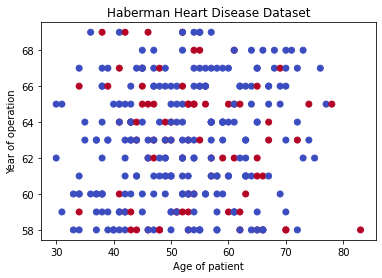

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
haberman = pd.read_csv('haberman.csv')

# Separate the data into features (X) and target (y)
X = haberman.iloc[:, :-1].values
y = haberman.iloc[:, -1].values

# Create a scatter plot of the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel('Age of patient')
plt.ylabel('Year of operation')
plt.title('Haberman Heart Disease Dataset')
plt.show()



Add Distorted Patterns to Data

In [11]:
# Find the maximum and minimum value of each column
num_cols = len(data[0])
max_vals = [max(col) for col in zip(*data)]
min_vals = [min(col) for col in zip(*data)]

# Print the maximum and minimum values
print("Max values:", max_vals)
print("Min values:", min_vals)


Max values: [83.0, 69.0, 52.0, 1]
Min values: [30.0, 58.0, 0.0, 0]


In [12]:



for i in range(0, 200):
    row = []
    for j in range(4):
        if j==3:
            row.append(random.randint(unique_labels[0], unique_labels[1]))
        else:
            row.append(random.uniform(-max_vals[j]*10, min_vals[j]))
    
    data.append(row)

random.shuffle(data)

In [13]:
# Shuffle the dataset
random.shuffle(data)
print(len(data))

# Set the ratio of training data to testing data
train_ratio = 0.6
test_ratio = 0.4

# Calculate the number of instances to use for training and testing
num_train = int(len(data) * train_ratio)
num_test = len(data) - num_train

train_data = data[:num_train]
test_data = data[num_train:]
print(data)


506
[[73.0, 62.0, 0.0, 0], [-218.794303421834, -350.67477762080927, -107.86807149294657, 1], [63.0, 63.0, 0.0, 0], [-472.5128448992631, -522.7431972775805, -74.54416851741735, 2], [55.0, 68.0, 15.0, 1], [43.0, 64.0, 0.0, 1], [-10.231542884958117, -599.0232391632238, -139.12266757642317, 1], [58.0, 61.0, 2.0, 0], [-46.69489057146734, -152.43432337409615, -480.39520614562645, 2], [54.0, 62.0, 0.0, 0], [69.0, 66.0, 0.0, 0], [66.0, 61.0, 13.0, 1], [49.0, 67.0, 1.0, 0], [-720.5343520146813, -650.0861224981567, -498.8928955607335, 2], [-711.3740358942767, 25.812929038233506, -329.7679063941479, 2], [56.0, 60.0, 0.0, 0], [39.0, 58.0, 0.0, 0], [-112.81385060559751, -570.502204736188, -16.79338675698665, 1], [37.0, 58.0, 0.0, 0], [44.0, 61.0, 0.0, 0], [-768.693783885421, -405.824926502884, -19.208955644140815, 1], [-113.4348223006541, -557.6534128559483, -144.92827027071485, 1], [31.0, 65.0, 4.0, 0], [53.0, 65.0, 12.0, 1], [34.0, 67.0, 7.0, 0], [60.0, 59.0, 17.0, 1], [-606.2635133300191, 38.699

In [14]:
accuracy_with_distorted_patterns = change_k(30)

In [15]:
print("Accuracy without distorted patterns:", accuracy_without_distorted_patterns)
print("Accuracy using Built-in module:", built_in_accuracy*100)
print("Accuracy with distorted patterns:", accuracy_with_distorted_patterns)

Accuracy without distorted patterns: (72.58064516129032, 29)
Accuracy using Built-in module: 76.08695652173914
Accuracy with distorted patterns: (42.857142857142854, 29)
